
# COVID‑19 Global Data Analysis — Capstone Project

Comprehensive exploratory data analysis (EDA) of global COVID‑19 trends including:

- Data preparation & feature engineering
- Global trend analysis
- Regional & country comparisons
- Growth dynamics & wave patterns
- Basic forecasting

Dataset Path:
E:\PROJECTS\COVID 19-MANOJ\covid_19_clean_complete.csv


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14,6)


In [16]:

# Load dataset
file_path = r"E:\\PROJECTS\\COVID 19-MANOJ\\covid_19_clean_complete.csv"
df = pd.read_csv(file_path)
df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:

# Data overview
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [4]:

# Data preparation
df['Date'] = pd.to_datetime(df['Date'])
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']


In [5]:

# Global totals over time
global_df = df.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()


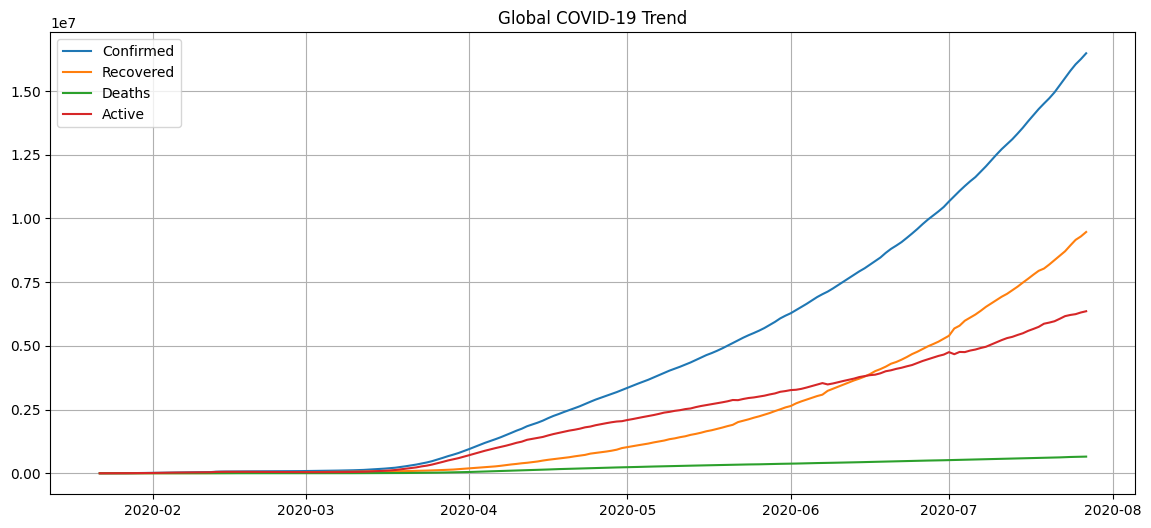

In [6]:

# Global trends
plt.plot(global_df['Date'], global_df['Confirmed'], label='Confirmed')
plt.plot(global_df['Date'], global_df['Recovered'], label='Recovered')
plt.plot(global_df['Date'], global_df['Deaths'], label='Deaths')
plt.plot(global_df['Date'], global_df['Active'], label='Active')
plt.title("Global COVID‑19 Trend")
plt.legend()
plt.grid(True)
plt.show()


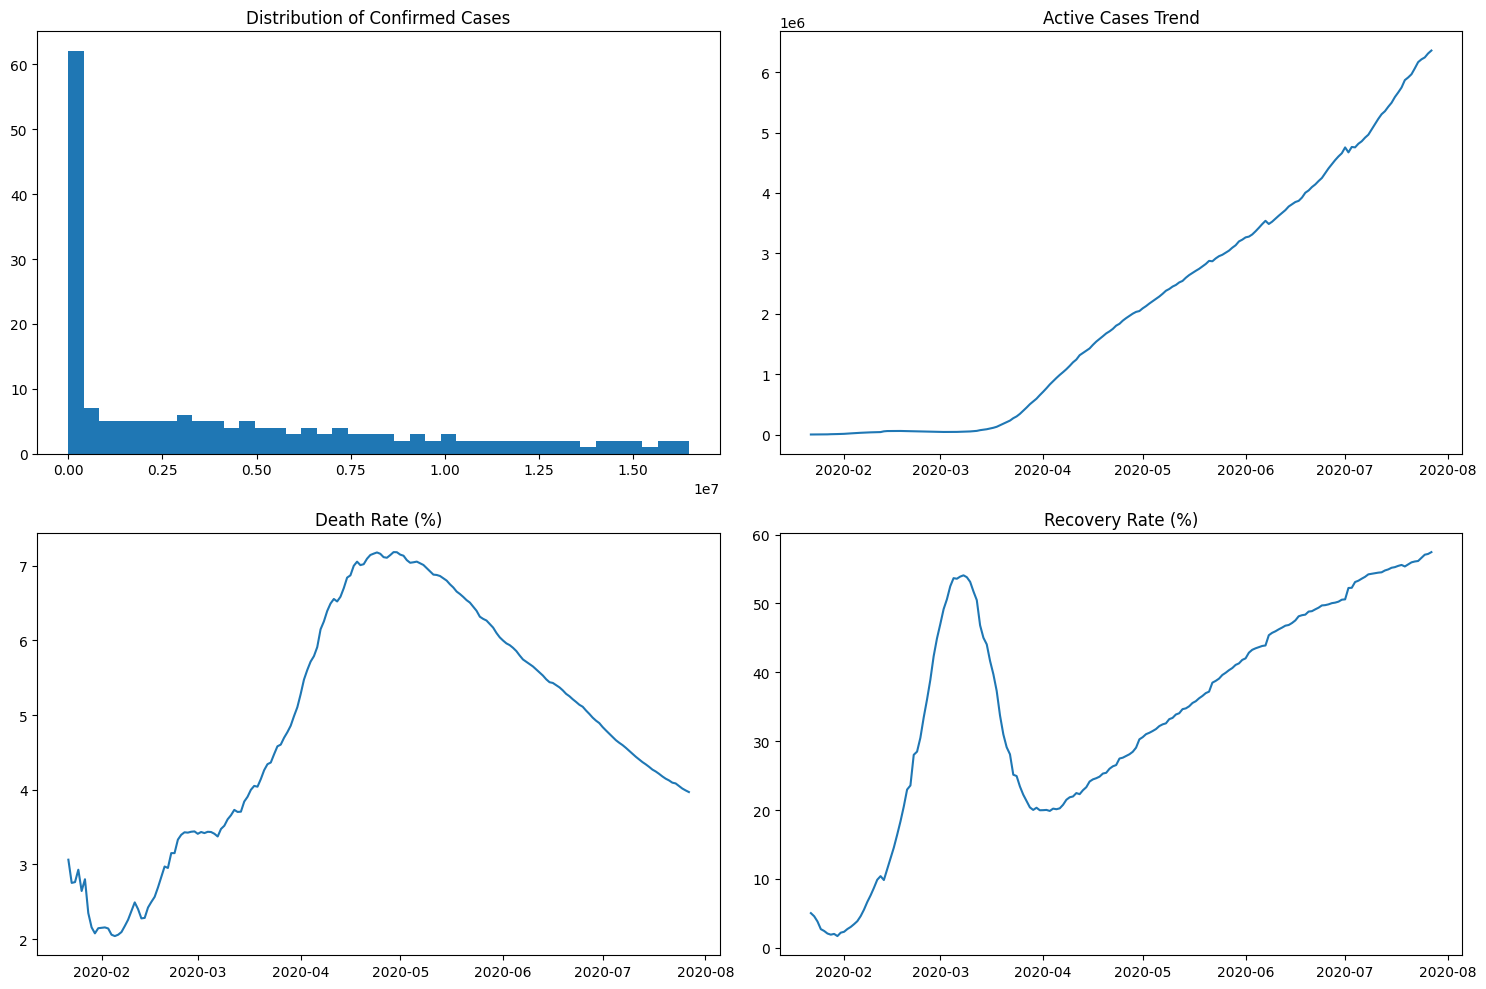

In [7]:

# Dashboard-style EDA
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(global_df['Confirmed'], bins=40)
plt.title("Distribution of Confirmed Cases")

plt.subplot(2,2,2)
plt.plot(global_df['Date'], global_df['Active'])
plt.title("Active Cases Trend")

death_rate = (global_df['Deaths'] / global_df['Confirmed']) * 100
plt.subplot(2,2,3)
plt.plot(global_df['Date'], death_rate)
plt.title("Death Rate (%)")

recovery_rate = (global_df['Recovered'] / global_df['Confirmed']) * 100
plt.subplot(2,2,4)
plt.plot(global_df['Date'], recovery_rate)
plt.title("Recovery Rate (%)")

plt.tight_layout()
plt.show()


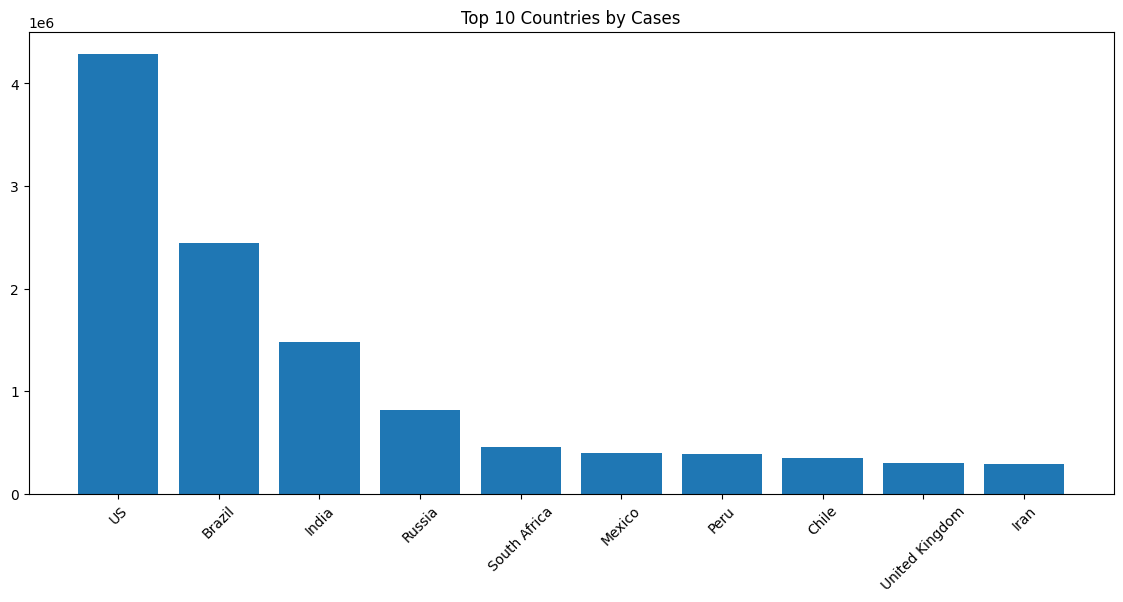

In [8]:

# Top 10 affected countries
latest = df[df['Date'] == df['Date'].max()]
top10 = latest.sort_values('Confirmed', ascending=False).head(10)

plt.bar(top10['Country/Region'], top10['Confirmed'])
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Cases")
plt.show()


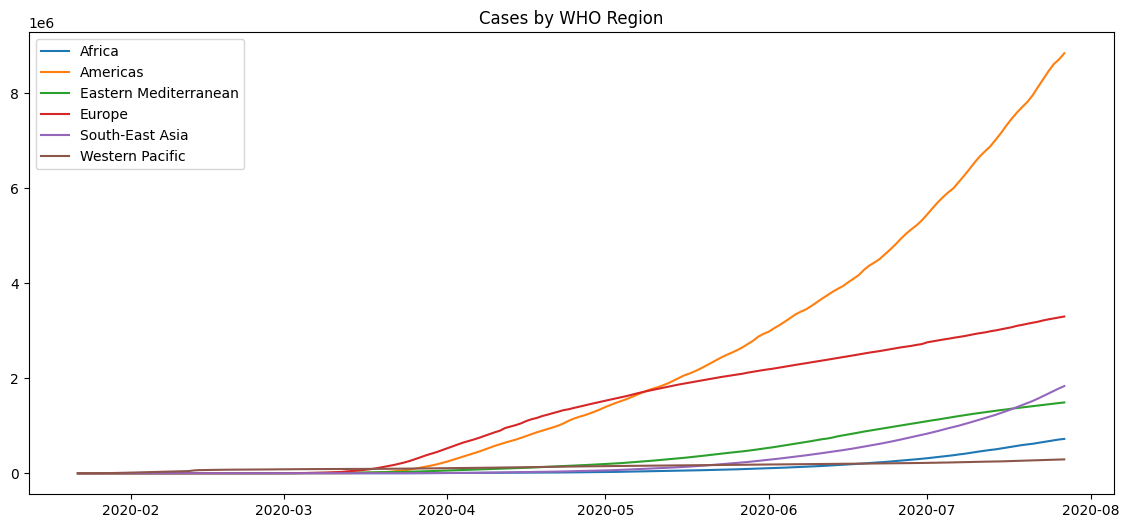

In [9]:

# WHO Region comparison
regions = df.groupby(['Date','WHO Region'])['Confirmed'].sum().reset_index()

for region in regions['WHO Region'].unique():
    data = regions[regions['WHO Region']==region]
    plt.plot(data['Date'], data['Confirmed'], label=region)

plt.legend()
plt.title("Cases by WHO Region")
plt.show()


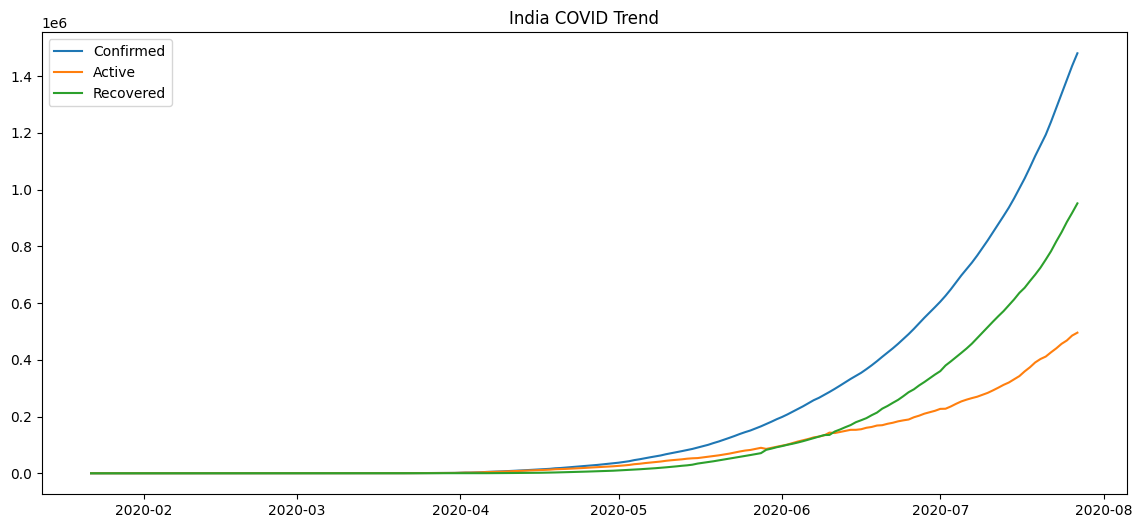

In [10]:

# Country deep dive: India
india = df[df['Country/Region']=="India"]     .groupby('Date')[['Confirmed','Active','Recovered']].sum().reset_index()

plt.plot(india['Date'], india['Confirmed'], label='Confirmed')
plt.plot(india['Date'], india['Active'], label='Active')
plt.plot(india['Date'], india['Recovered'], label='Recovered')
plt.legend()
plt.title("India COVID Trend")
plt.show()


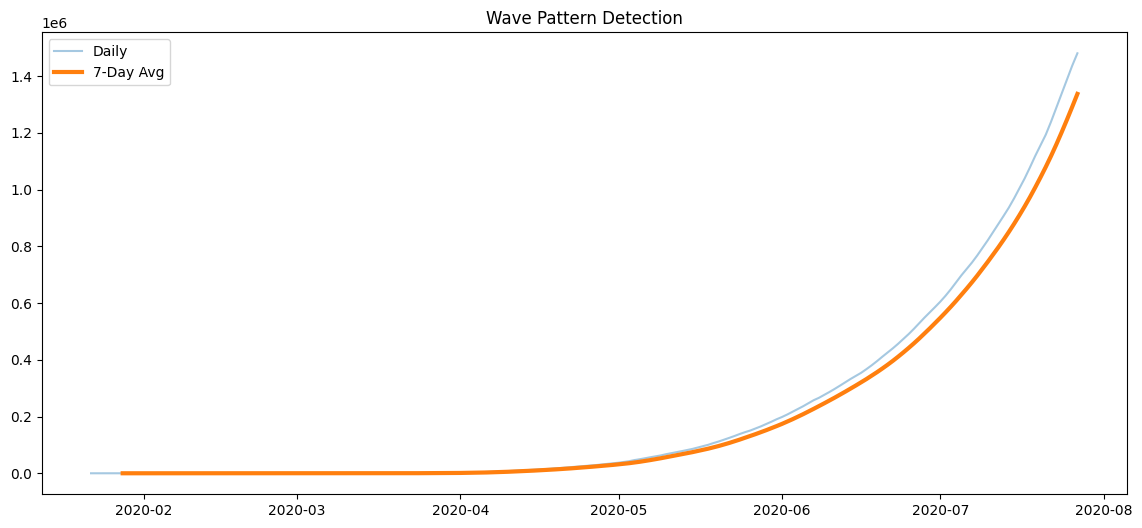

In [11]:

# Moving average (wave pattern)
india['7day_avg'] = india['Confirmed'].rolling(7).mean()

plt.plot(india['Date'], india['Confirmed'], alpha=0.4, label='Daily')
plt.plot(india['Date'], india['7day_avg'], linewidth=3, label='7-Day Avg')
plt.legend()
plt.title("Wave Pattern Detection")
plt.show()


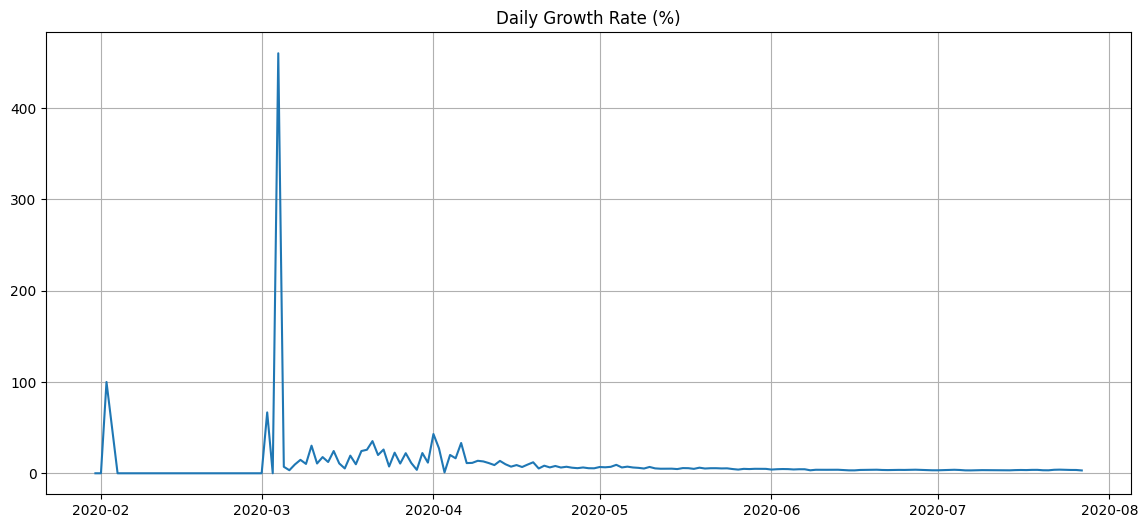

In [12]:

# Growth rate
india['Growth %'] = india['Confirmed'].pct_change()*100
plt.plot(india['Date'], india['Growth %'])
plt.title("Daily Growth Rate (%)")
plt.grid(True)
plt.show()


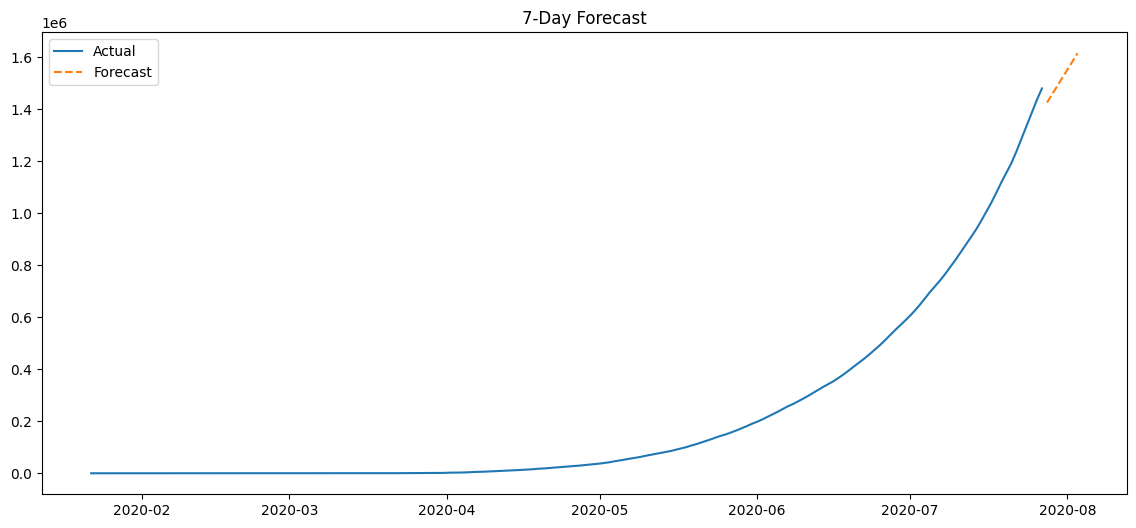

In [13]:

# Simple 7-day forecast
last30 = india.tail(30)
x = np.arange(len(last30))
y = last30['Confirmed']

coef = np.polyfit(x, y, 1)
future_x = np.arange(len(last30)+7)
forecast = coef[0]*future_x + coef[1]

future_dates = pd.date_range(india['Date'].iloc[-1], periods=8, freq='D')[1:]

plt.plot(india['Date'], india['Confirmed'], label='Actual')
plt.plot(future_dates, forecast[-7:], linestyle='--', label='Forecast')
plt.legend()
plt.title("7-Day Forecast")
plt.show()


In [14]:
# FINAL INSIGHTS & CONCLUSION

latest_date = global_df['Date'].max()

total_confirmed = int(global_df['Confirmed'].iloc[-1])
total_recovered = int(global_df['Recovered'].iloc[-1])
total_deaths = int(global_df['Deaths'].iloc[-1])
total_active = int(global_df['Active'].iloc[-1])

recovery_rate = (total_recovered / total_confirmed) * 100
death_rate = (total_deaths / total_confirmed) * 100

# most affected country
latest = df[df['Date'] == latest_date]
top_country = latest.sort_values(by='Confirmed', ascending=False).iloc[0]['Country/Region']

# peak day detection
peak_day = global_df.loc[global_df['Confirmed'].idxmax(), 'Date']

print("===== FINAL ANALYSIS SUMMARY =====\n")

print(f"Latest Data Date: {latest_date.date()}\n")

print(f"Total Confirmed Cases : {total_confirmed:,}")
print(f"Total Recovered Cases : {total_recovered:,}")
print(f"Total Deaths          : {total_deaths:,}")
print(f"Active Cases          : {total_active:,}\n")

print(f"Global Recovery Rate  : {recovery_rate:.2f}%")
print(f"Global Death Rate     : {death_rate:.2f}%\n")

print(f"Most Affected Country : {top_country}")
print(f"Peak Infection Day    : {peak_day.date()}\n")

print("===== CONCLUSION =====\n")

if recovery_rate > 90:
    print("• Recovery performance has been strong globally.")
else:
    print("• Recovery rate indicates prolonged healthcare burden.")

if death_rate < 3:
    print("• Death rate remained relatively controlled.")
else:
    print("• Death rate indicates significant healthcare stress.")

print("• Global cases showed exponential growth followed by stabilization phases.")
print("• Multiple waves can be observed from the moving average trends.")
print("• Active cases trend highlights pressure periods on healthcare systems.")
print("• Regional differences indicate uneven spread and response effectiveness.")
print("• Continued monitoring and vaccination strategies remain essential.")

===== FINAL ANALYSIS SUMMARY =====

Latest Data Date: 2020-07-27

Total Confirmed Cases : 16,480,485
Total Recovered Cases : 9,468,087
Total Deaths          : 654,036
Active Cases          : 6,358,362

Global Recovery Rate  : 57.45%
Global Death Rate     : 3.97%

Most Affected Country : US
Peak Infection Day    : 2020-07-27

===== CONCLUSION =====

• Recovery rate indicates prolonged healthcare burden.
• Death rate indicates significant healthcare stress.
• Global cases showed exponential growth followed by stabilization phases.
• Multiple waves can be observed from the moving average trends.
• Active cases trend highlights pressure periods on healthcare systems.
• Regional differences indicate uneven spread and response effectiveness.
• Continued monitoring and vaccination strategies remain essential.
